<a href="https://colab.research.google.com/github/nandhukumar86/CapstonePneumoniaDetection/blob/main/Nandha/Capstone_Project_Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install kaggle
! pip install -q kaggle

# upload file to Colab
from google.colab import files
files.upload()

# create kaggle folder in root and copy the file.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# provide permissions
! chmod 600 ~/.kaggle/kaggle.json

# download competition files by providing competition name
! kaggle competitions download -c 'rsna-pneumonia-detection-challenge'

# unzip the files and folders
#! unzip train.csv.zip -d train
#! unzip test.csv.zip -d test


Saving kaggle.json to kaggle.json
  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 35.8MB/s]
  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 35.5MB/s]
  0% 0.00/126k [00:00<?, ?B/s]
100% 126k/126k [00:00<00:00, 83.8MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 43.5MB/s]
  0% 0.00/118k [00:00<?, ?B/s]
100% 118k/118k [00:00<00:00, 38.0MB/s]
  0% 0.00/123k [00:00<?, ?B/s]
100% 123k/123k [00:00<00:00, 36.7MB/s]
  0% 0.00/99.1k [00:00<?, ?B/s]
100% 99.1k/99.1k [00:00<00:00, 30.8MB/s]
  0% 0.00/153k [00:00<?, ?B/s]
100% 153k/153k [00:00<00:00, 50.2MB/s]
  0% 0.00/139k [00:00<?, ?B/s]
100% 139k/139k [00:00<00:00, 41.8MB/s]
  0% 0.00/128k [00:00<?, ?B/s]
100% 128k/128k [00:00<00:00, 128MB/s]
  0% 0.00/138k [00:00<?, ?B/s]
100% 138k/138k [00:00<00:00, 129MB/s]
  0% 0.00/89.3k [00:00<?, ?B/s]
100% 89.3k/89.3k [00:00<00:00, 81.8MB/s]
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 99.0MB/s]
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00

In [2]:
! unzip '/content/stage_2_train_labels.csv.zip' -d stage_2_train_labels

Archive:  /content/stage_2_train_labels.csv.zip
  inflating: stage_2_train_labels/stage_2_train_labels.csv  


In [3]:
! unzip '/content/stage_2_detailed_class_info.csv.zip' -d stage_2_detailed_class_info

Archive:  /content/stage_2_detailed_class_info.csv.zip
  inflating: stage_2_detailed_class_info/stage_2_detailed_class_info.csv  


In [4]:
import numpy as np
import pandas as pd

In [5]:
df_stage_2_detailed_class_info = pd.read_csv('/content/stage_2_detailed_class_info/stage_2_detailed_class_info.csv')


In [6]:
df_stage_2_detailed_class_info.shape

(30227, 2)

In [7]:
df_stage_2_detailed_class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [8]:
df_stage_2_train_labels = pd.read_csv('/content/stage_2_train_labels/stage_2_train_labels.csv')


In [9]:
df_stage_2_train_labels.shape

(30227, 6)

In [10]:
df_stage_2_train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [11]:
df_stage_2_detailed_class_info.describe().T

,count,unique,top,freq
patientId,30227,26684,0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d,4
class,30227,3,No Lung Opacity / Not Normal,11821


In [12]:
df_stage_2_train_labels.describe().T

,count,mean,std,min,25%,50%,75%,max
x,9555.0,394.047724,204.574172,2.0,207.0,324.0,594.0,835.0
y,9555.0,366.839560,148.940488,2.0,249.0,365.0,478.5,881.0
width,9555.0,218.471376,59.289475,40.0,177.0,217.0,259.0,528.0
height,9555.0,329.269702,157.750755,45.0,203.0,298.0,438.0,942.0
Target,30227.0,0.316108,0.464963,0.0,0.0,0.0,1.0,1.0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


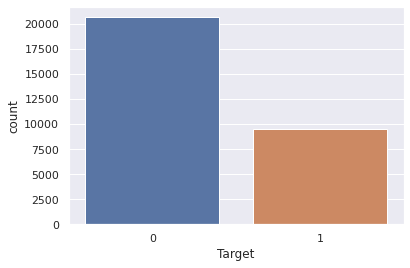

In [14]:
sns.countplot(df_stage_2_train_labels['Target']);

In [15]:
df_stage_2_train_labels['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


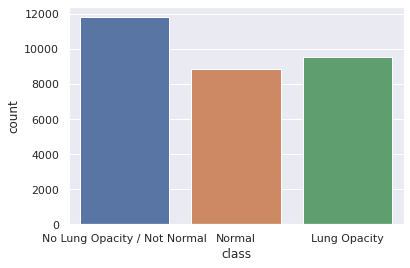

In [16]:
sns.countplot(df_stage_2_detailed_class_info['class']);

In [17]:
df_stage_2_detailed_class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [18]:
print('\nColumns:\n',df_stage_2_train_labels.columns)
print('\nData types:\n',df_stage_2_train_labels.dtypes)
print('\nSize:\n',df_stage_2_train_labels.size)
print('\nShape:\n',df_stage_2_train_labels.shape)
print('\nNull checks:\n',df_stage_2_train_labels.isnull().sum())
print('\nDescribe:\n',df_stage_2_train_labels.describe().T)



Columns:
 Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')

Data types:
 patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
dtype: object

Size:
 181362

Shape:
 (30227, 6)

Null checks:
 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

Describe:
           count        mean         std   min    25%    50%    75%    max
x        9555.0  394.047724  204.574172   2.0  207.0  324.0  594.0  835.0
y        9555.0  366.839560  148.940488   2.0  249.0  365.0  478.5  881.0
width    9555.0  218.471376   59.289475  40.0  177.0  217.0  259.0  528.0
height   9555.0  329.269702  157.750755  45.0  203.0  298.0  438.0  942.0
Target  30227.0    0.316108    0.464963   0.0    0.0    0.0    1.0    1.0


In [19]:
print('\nColumns:\n',df_stage_2_detailed_class_info.columns)
print('\nData types:\n',df_stage_2_detailed_class_info.dtypes)
print('\nSize:\n',df_stage_2_detailed_class_info.size)
print('\nShape:\n',df_stage_2_detailed_class_info.shape)
print('\nNull checks:\n',df_stage_2_detailed_class_info.isnull().sum())
print('\nDescribe:\n',df_stage_2_detailed_class_info.describe().T)



Columns:
 Index(['patientId', 'class'], dtype='object')

Data types:
 patientId    object
class        object
dtype: object

Size:
 60454

Shape:
 (30227, 2)

Null checks:
 patientId    0
class        0
dtype: int64

Describe:
            count unique                                   top   freq
patientId  30227  26684  0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d      4
class      30227      3          No Lung Opacity / Not Normal  11821


In [33]:
file1 = '/content/0000a175-0e68-4ca4-b1af-167204a7e0bc.dcm'

In [42]:
!pip install pydicom
import pydicom
from pydicom import dcmread

In [49]:
img = dcmread(file1)

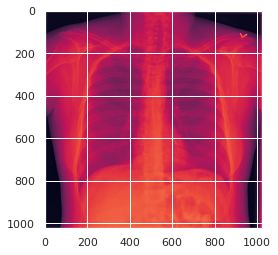

In [50]:
plt.imshow(img.pixel_array);

In [53]:
img.PatientAge

'46'

In [54]:
img.pixel_array

array([[ 54,  49,  44, ..., 141, 140, 142],
       [ 48,  42,  38, ..., 141, 141, 142],
       [ 42,  37,  33, ..., 139, 140, 140],
       ...,
       [ 23,  23,  23, ..., 140, 139, 139],
       [ 24,  24,  24, ..., 141, 140, 139],
       [ 26,  26,  26, ..., 142, 142, 142]], dtype=uint8)